# [TensorFlow, KerasでVGG16などの学習済みモデルを利用](https://www.kaggle.com/code/mitsuya3471/tensorflow-keras-vgg16/)の解答例

[Pokemon Image Dataset](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)を使います

In [1]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
img = Image.open('/kaggle/input/pokemon-images-and-types/images/images/abomasnow.png')

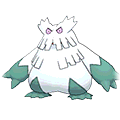

In [3]:
img

## [画像データフォーマット](https://imagingsolution.net/program/python/pillow/image_data_format/)`mode`で確認

In [4]:
img.mode

'RGBA'

In [5]:
vgg16_model = tf.keras.applications.vgg16.VGG16(weights='imagenet')

2023-02-15 09:49:38.580821: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


553476096/553467096 [==============================] - 10s 0us/step


## `input_shape`を使ってモデルの入力サイズを確認する

(バッチサイズ、幅、高さ、色）

In [6]:
vgg16_model.input_shape

(None, 224, 224, 3)

In [7]:
print(f'画像のサイズ: {img.size} モデルの入力: {vgg16_model.input_shape[1:-1]}')

画像のサイズ: (120, 120) モデルの入力: (224, 224)


## モデルの入力に合わせて、画像を拡大(`resize`)、フォーマット変換(`convert`)する

In [8]:
img = img.convert('RGB')
img = img.resize( (224, 224), Image.Resampling.NEAREST)

## numpyに変換,次元拡張

In [9]:
img_array = utils.img_to_array(img)
img_array = img_array[None, ...]
print(img_array.shape)

(1, 224, 224, 3)


In [10]:
predictions = vgg16_model.predict(img_array)

2023-02-15 09:49:51.751245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [11]:
import pprint
result = tf.keras.applications.vgg16.decode_predictions(predictions, top=5)
pprint.pprint(result)

49152/35363 [=========================================] - 0s 0us/step
[[('n02692877', 'airship', 0.44174436),
  ('n03637318', 'lampshade', 0.23275629),
  ('n03888257', 'parachute', 0.05775254),
  ('n03476684', 'hair_slide', 0.0540595),
  ('n04346328', 'stupa', 0.040007602)]]


# TenflowHubのモデルの場合

In [12]:
import tensorflow_hub as hub
tf_model = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1")

In [13]:
outputs = tf_model(img_array)

## バウンディングボックスを取得

In [14]:
boxes = outputs["detection_boxes"][0]

## 座標変換
バウンディングボックスは0~1で正規化されています。画像に合わせて座標を決めます。

In [15]:
import numpy as np
height, width = img_array.shape[1:3]
box = boxes[0] * np.array([height, width, height, width])
y_min, x_min, y_max, x_max = box.numpy().astype(int)

In [16]:
from PIL import ImageDraw
rgb_image = img.copy()
draw = ImageDraw.Draw(rgb_image)
draw.rectangle((x_min, y_min, x_max-x_min, y_max-y_min), outline=(255, 255, 255))

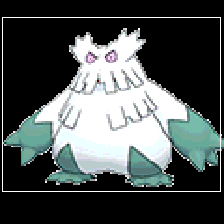

In [17]:
rgb_image